In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [260]:
df=pd.read_csv('Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [261]:
# checking the missing values
df.isnull().sum()/df.shape[0]*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [266]:
# checking the duplicate rows
df.duplicated().sum()

0

In [145]:
# for i in [' BMI ','Polio','Income composition of resources']:
#     df[i].fillna(df[i].median(),inplace=True)

In [272]:
# filling the missing values
from sklearn.impute import KNNImputer
impute=KNNImputer()


In [274]:
for i in df.select_dtypes(include='number').columns:
    df[i]=impute.fit_transform(df[[i]])

In [284]:
df.isnull().sum().sum()

0

In [153]:
col=df.columns
col

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

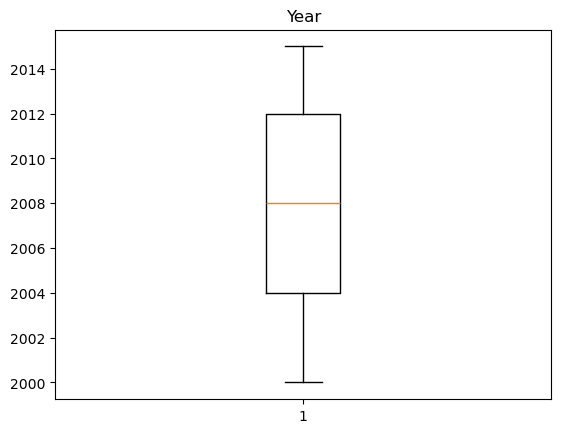

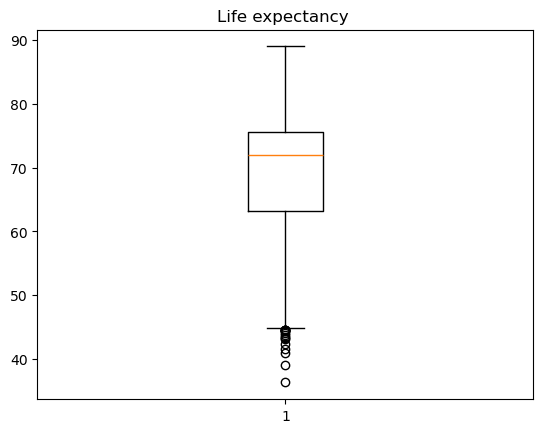

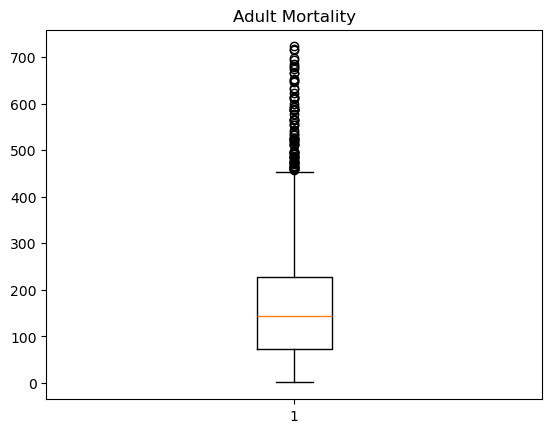

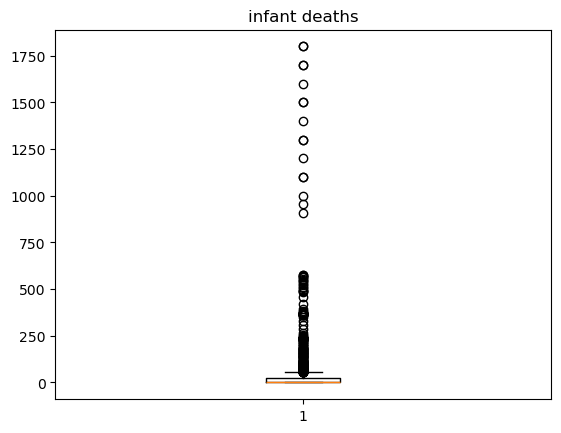

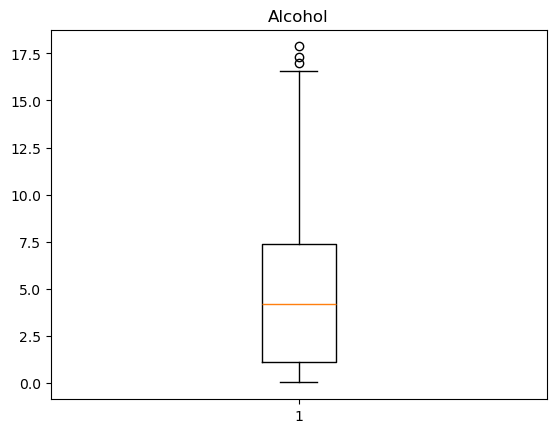

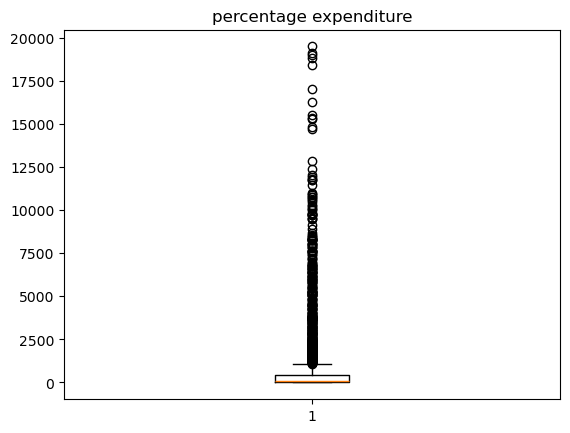

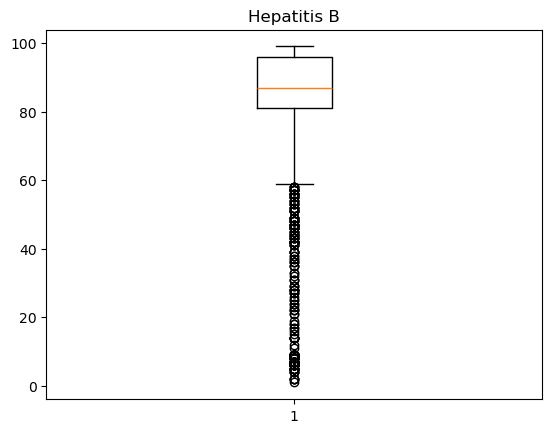

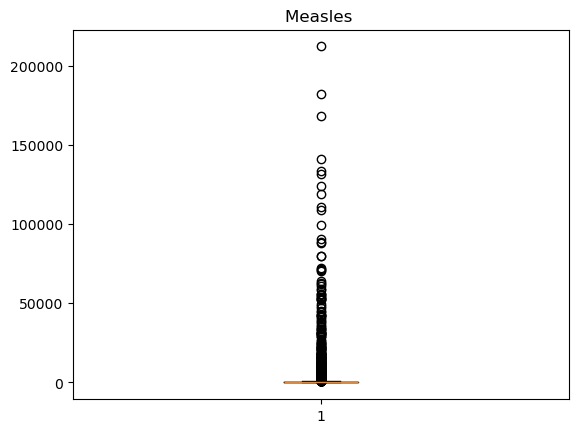

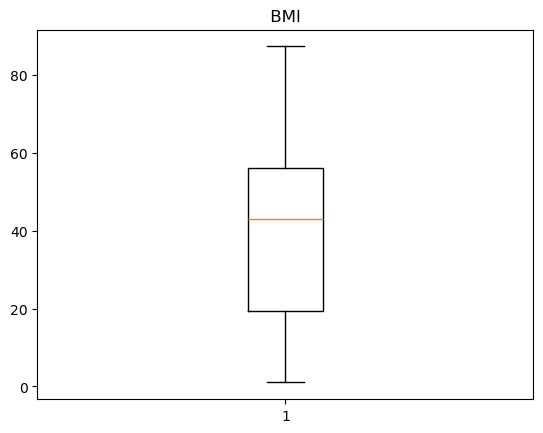

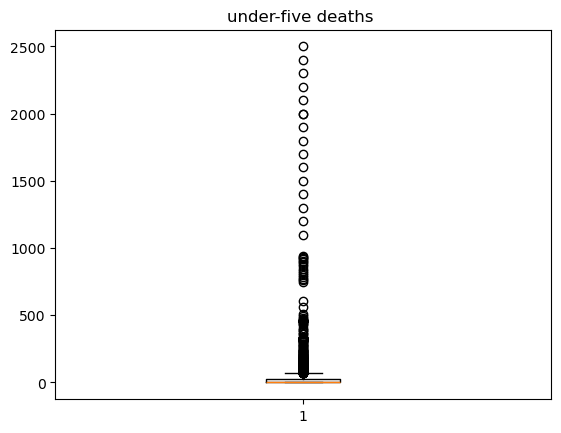

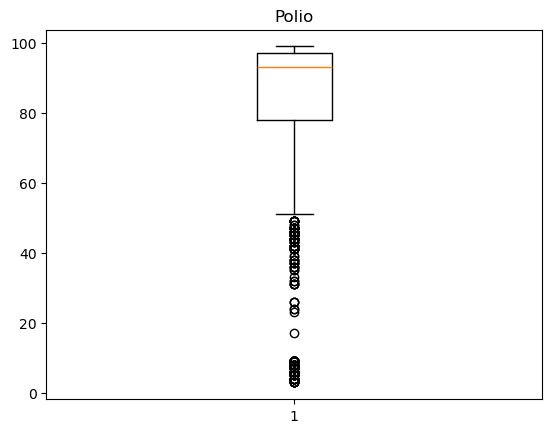

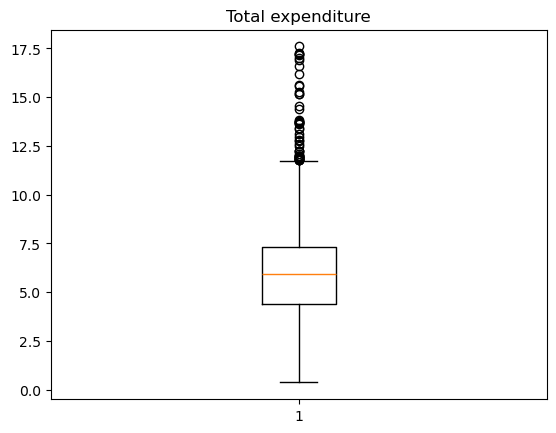

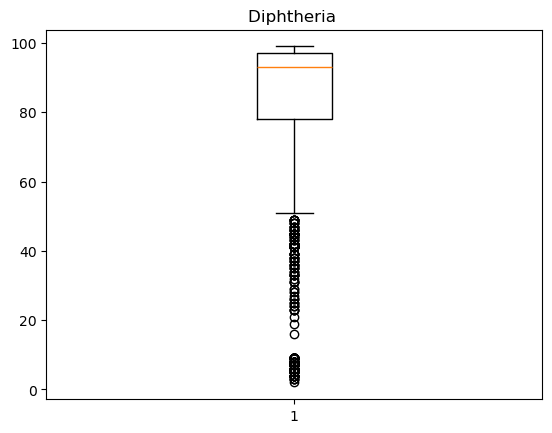

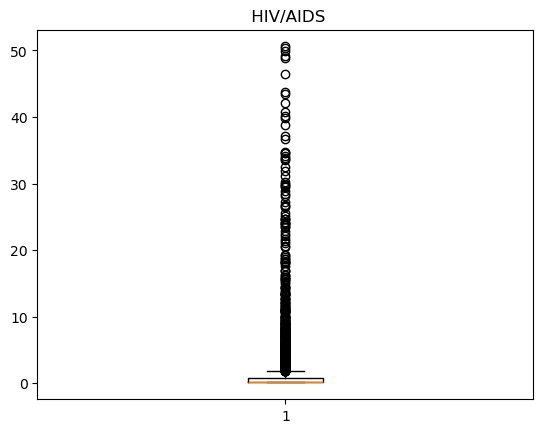

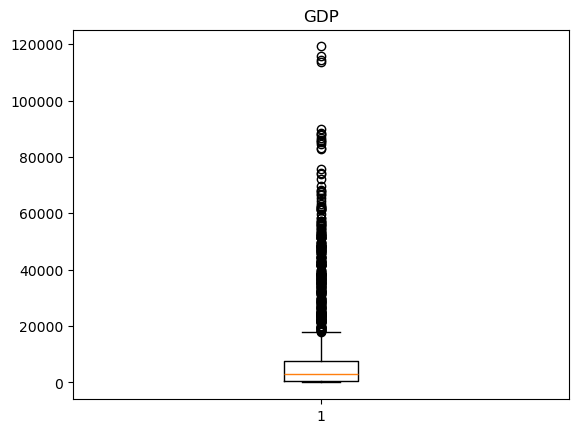

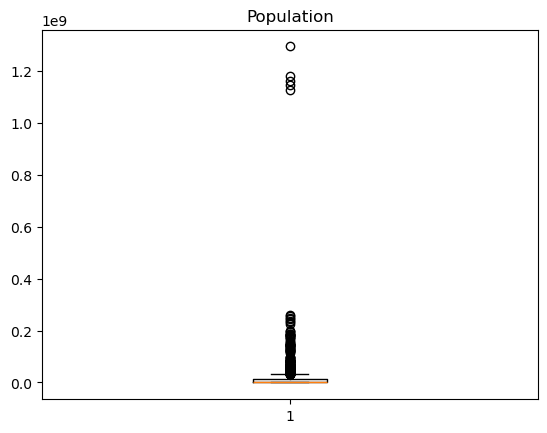

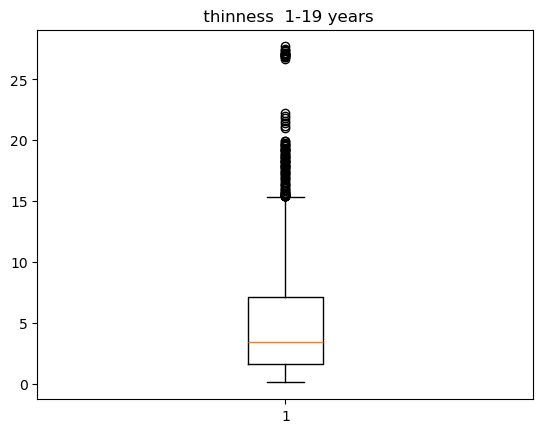

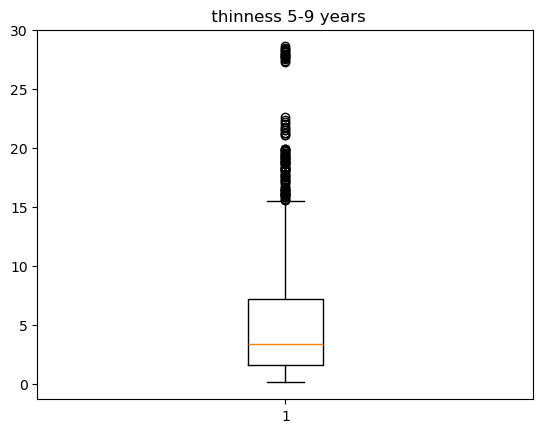

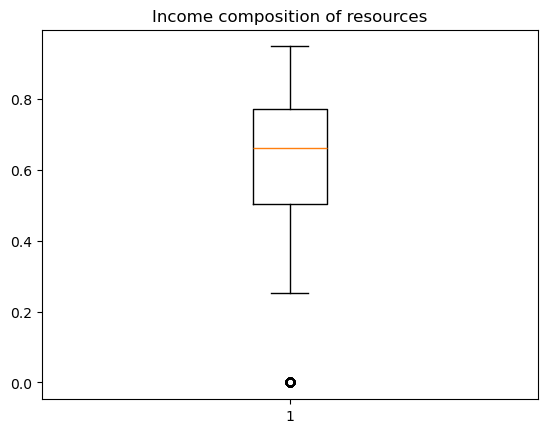

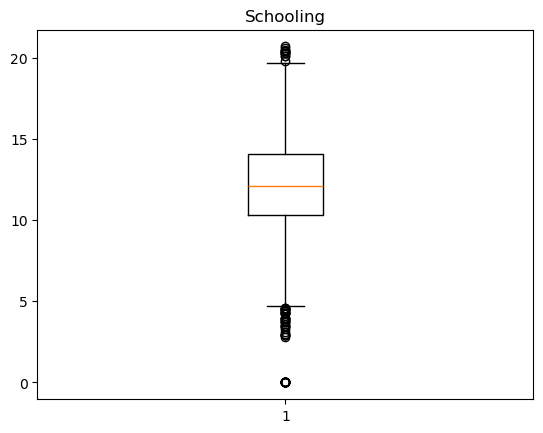

In [288]:
for i in df.select_dtypes(include='number').columns:
    plt.title(i)
    plt.boxplot(df[i])
    plt.show()

In [155]:
# cauculatin thew upper limit & lower limit
def whisker(col):
    global lw,uw
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*(iqr)
    uw=q3+1.5*(iqr)
    return lw,uw
whisker(df['GDP'])

(-9773.52021495771, 17837.165679596183)

In [290]:
# treating the outliers
for i in df.select_dtypes(include='number').columns:
    lw,uw=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

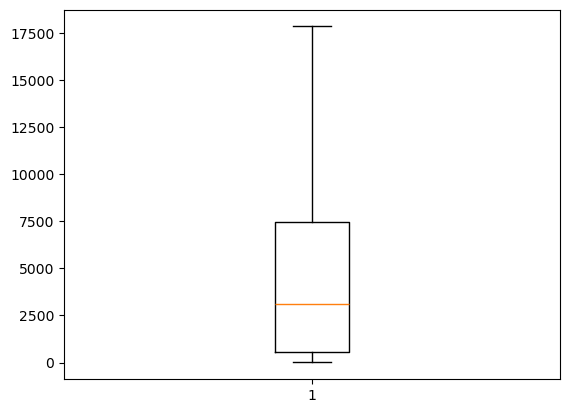

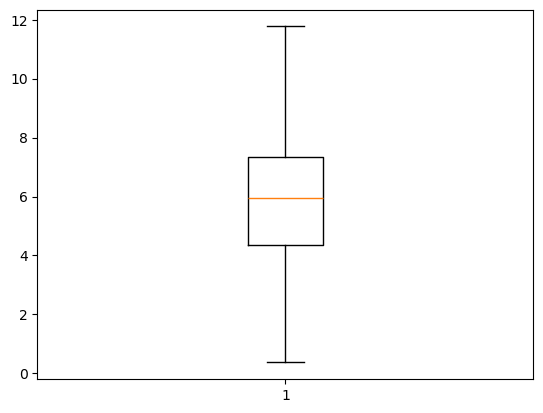

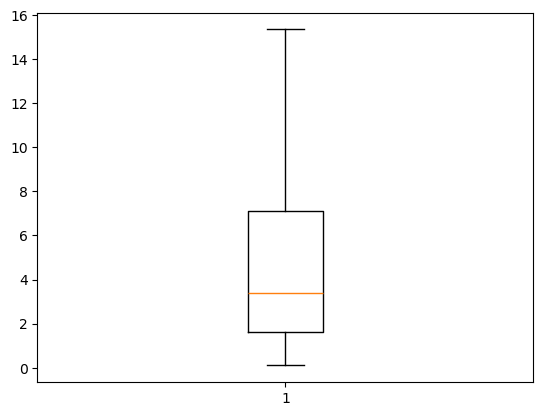

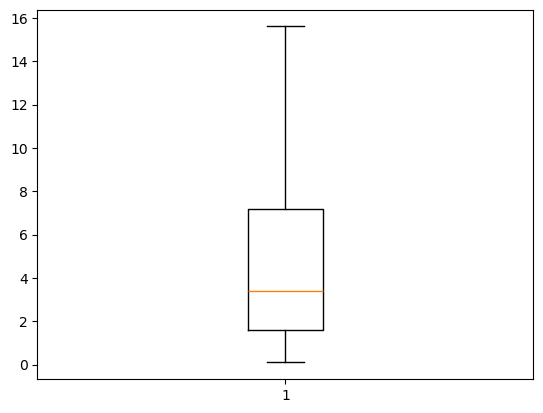

In [292]:
for i in ['GDP','Total expenditure',' thinness  1-19 years',' thinness 5-9 years']:
    plt.boxplot(df[i])
    plt.show()

In [294]:
# encoding the categirical columns

In [296]:
(df['Country'].value_counts().values==16).sum()

183

In [298]:
df1=df.groupby(['Country','Status'])['Life expectancy '].mean().reset_index()
df1

,Country,Status,Life expectancy
0,Afghanistan,Developing,58.19375
1,Albania,Developing,75.15625
2,Algeria,Developing,73.61875
3,Angola,Developing,49.01875
4,Antigua and Barbuda,Developing,75.05625
...,...,...,...
188,Venezuela (Bolivarian Republic of),Developing,73.38750
189,Viet Nam,Developing,74.77500
190,Yemen,Developing,63.86250
191,Zambia,Developing,53.95625


In [300]:
df2=pd.merge(df,df1,how='inner',on=['Country','Status'])
df2

,Country,Year,Status,Life expectancy _x,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy _y
0,Afghanistan,2015.0,Developing,65.0,263.0,55.0,0.01,71.279624,65.000000,900.625,...,8.16,65.0,0.10,584.259210,3.125506e+07,15.35,15.6,0.479,10.1,58.19375
1,Afghanistan,2014.0,Developing,59.9,271.0,55.0,0.01,73.523582,62.000000,492.000,...,8.18,62.0,0.10,612.696514,3.275820e+05,15.35,15.6,0.476,10.0,58.19375
2,Afghanistan,2013.0,Developing,59.9,268.0,55.0,0.01,73.219243,64.000000,430.000,...,8.13,64.0,0.10,631.744976,3.125506e+07,15.35,15.6,0.470,9.9,58.19375
3,Afghanistan,2012.0,Developing,59.5,272.0,55.0,0.01,78.184215,67.000000,900.625,...,8.52,67.0,0.10,669.959000,3.696958e+06,15.35,15.6,0.463,9.8,58.19375
4,Afghanistan,2011.0,Developing,59.2,275.0,55.0,0.01,7.097109,68.000000,900.625,...,7.87,68.0,0.10,63.537231,2.978599e+06,15.35,15.6,0.454,9.5,58.19375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004.0,Developing,44.6,456.5,27.0,4.36,0.000000,68.000000,31.000,...,7.13,65.0,1.85,454.366654,1.277751e+07,9.40,9.4,0.407,9.2,50.51250
2934,Zimbabwe,2003.0,Developing,44.6,456.5,26.0,4.06,0.000000,58.351153,900.625,...,6.52,68.0,1.85,453.351155,1.263390e+07,9.80,9.9,0.418,9.5,50.51250
2935,Zimbabwe,2002.0,Developing,44.8,73.0,25.0,4.43,0.000000,73.000000,304.000,...,6.53,71.0,1.85,57.348340,1.255250e+05,1.20,1.3,0.427,10.0,50.51250
2936,Zimbabwe,2001.0,Developing,45.3,456.5,25.0,1.72,0.000000,76.000000,529.000,...,6.16,75.0,1.85,548.587312,1.236616e+07,1.60,1.7,0.427,9.8,50.51250


In [302]:
df2=pd.get_dummies(data=df2,columns=['Status'],drop_first=True)
df2

,Country,Year,Life expectancy _x,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy _y,Status_Developing
0,Afghanistan,2015.0,65.0,263.0,55.0,0.01,71.279624,65.000000,900.625,19.1,...,65.0,0.10,584.259210,3.125506e+07,15.35,15.6,0.479,10.1,58.19375,True
1,Afghanistan,2014.0,59.9,271.0,55.0,0.01,73.523582,62.000000,492.000,18.6,...,62.0,0.10,612.696514,3.275820e+05,15.35,15.6,0.476,10.0,58.19375,True
2,Afghanistan,2013.0,59.9,268.0,55.0,0.01,73.219243,64.000000,430.000,18.1,...,64.0,0.10,631.744976,3.125506e+07,15.35,15.6,0.470,9.9,58.19375,True
3,Afghanistan,2012.0,59.5,272.0,55.0,0.01,78.184215,67.000000,900.625,17.6,...,67.0,0.10,669.959000,3.696958e+06,15.35,15.6,0.463,9.8,58.19375,True
4,Afghanistan,2011.0,59.2,275.0,55.0,0.01,7.097109,68.000000,900.625,17.2,...,68.0,0.10,63.537231,2.978599e+06,15.35,15.6,0.454,9.5,58.19375,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004.0,44.6,456.5,27.0,4.36,0.000000,68.000000,31.000,27.1,...,65.0,1.85,454.366654,1.277751e+07,9.40,9.4,0.407,9.2,50.51250,True
2934,Zimbabwe,2003.0,44.6,456.5,26.0,4.06,0.000000,58.351153,900.625,26.7,...,68.0,1.85,453.351155,1.263390e+07,9.80,9.9,0.418,9.5,50.51250,True
2935,Zimbabwe,2002.0,44.8,73.0,25.0,4.43,0.000000,73.000000,304.000,26.3,...,71.0,1.85,57.348340,1.255250e+05,1.20,1.3,0.427,10.0,50.51250,True
2936,Zimbabwe,2001.0,45.3,456.5,25.0,1.72,0.000000,76.000000,529.000,25.9,...,75.0,1.85,548.587312,1.236616e+07,1.60,1.7,0.427,9.8,50.51250,True


In [306]:
df2.columns

Index(['Country', 'Year', 'Life expectancy _x', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Life expectancy _y',
       'Status_Developing'],
      dtype='object')

In [308]:
X=df2.drop(columns=['Country','Life expectancy _x'])
y=df2['Life expectancy _x']

In [310]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as mse

In [312]:
st=StandardScaler()
x_scaled=st.fit_transform(X)

In [314]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=2)

In [316]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(2350, 21) (2350,)
(588, 21) (588,)


In [318]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [320]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [322]:
r2_score(y_train,y_pred_train)

0.9579643943257882

In [324]:
r2_score(y_test,y_pred_test)

0.9548085110816884

In [326]:
mse(y_train,y_pred_train)

3.6954820806139947

In [328]:
mse(y_test,y_pred_test)

4.402938071621131

In [331]:
from sklearn.svm import SVR


In [333]:
svr=SVR()
svr.fit(x_train,y_train)


SVR()

In [334]:
y_pred_train=svr.predict(x_train)
y_pred_test=svr.predict(x_test)

In [335]:
r2_score(y_train,y_pred_train)

0.9477633708185619

In [337]:
r2_score(y_test,y_pred_test)

0.934518034042801

In [338]:
from sklearn.neighbors import KNeighborsRegressor

In [339]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [340]:
y_pred_train=knn.predict(x_train)
y_pred_test=knn.predict(x_test)

In [341]:
r2_score(y_train,y_pred_train)

0.9532470902523962

In [344]:
r2_score(y_test,y_pred_test)

0.9290120202332265

In [348]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [349]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2350, 21) (2350,)
(588, 21) (588,)


In [350]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

In [351]:
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [352]:
y_pred_train=dt.predict(X_train)
y_pred_test=dt.predict(X_test)

In [354]:
r2_score(Y_train,y_pred_train)

1.0

In [357]:
r2_score(Y_test,y_pred_test)

0.9628354374215355

In [358]:
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [362]:
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

In [365]:
r2_score(Y_train,y_pred_train)

0.9963152344415315

In [368]:
r2_score(Y_test,y_pred_test)

0.9725199889048153

In [369]:
etr=ExtraTreesRegressor()
etr.fit(X_train,Y_train)

ExtraTreesRegressor()

In [370]:
y_pred_test=etr.predict(X_test)
y_pred_train=etr.predict(X_train)

In [371]:
r2_score(Y_test,y_pred_test)

0.9760439650671021

In [372]:
r2_score(Y_train,y_pred_train)

0.9999999979960879